In [1]:
import json
questions = json.load(open('/data/c/zhuowan/SuperClevr/super-clevr/output/ver_mask/questions/superCLEVR_questions_merged.json'))
part_questions = json.load(open('/data/c/zhuowan/SuperClevr/super-clevr/output/ver_mask/questions/superCLEVR_questions_part_partquery.json'))

In [146]:
from collections import Counter
question_type_count = Counter()
for q in questions['questions'][:]:
    question_type_count[q['program'][-1]['type']] += 1
part_question_type_count = Counter()
for q in part_questions['questions'][:]:
    part_question_type_count[q['program'][-1]['type']] += 1

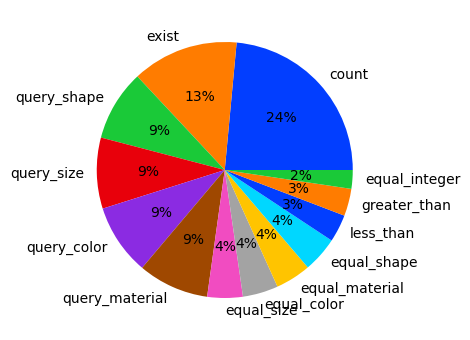

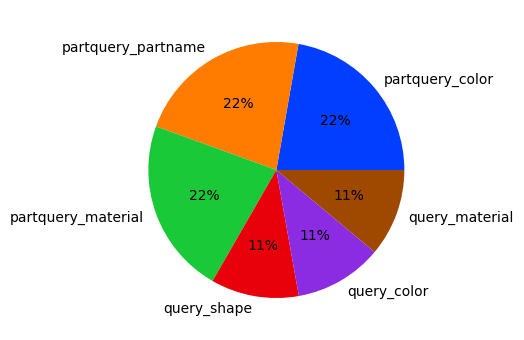

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# print(question_type_count, part_question_type_count)
data = [c[1] for c in question_type_count.most_common()]
labels = [c[0] for c in question_type_count.most_common()]
# labels = ['slice 1', 'slice 2', 'slice 3', 'slice 4', 'slice 5']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

data = [c[1] for c in part_question_type_count.most_common()]
labels = [c[0] for c in part_question_type_count.most_common()]
# labels = ['slice 1', 'slice 2', 'slice 3', 'slice 4', 'slice 5']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()


['query', 'count', 'equal', 'exist', 'compare']


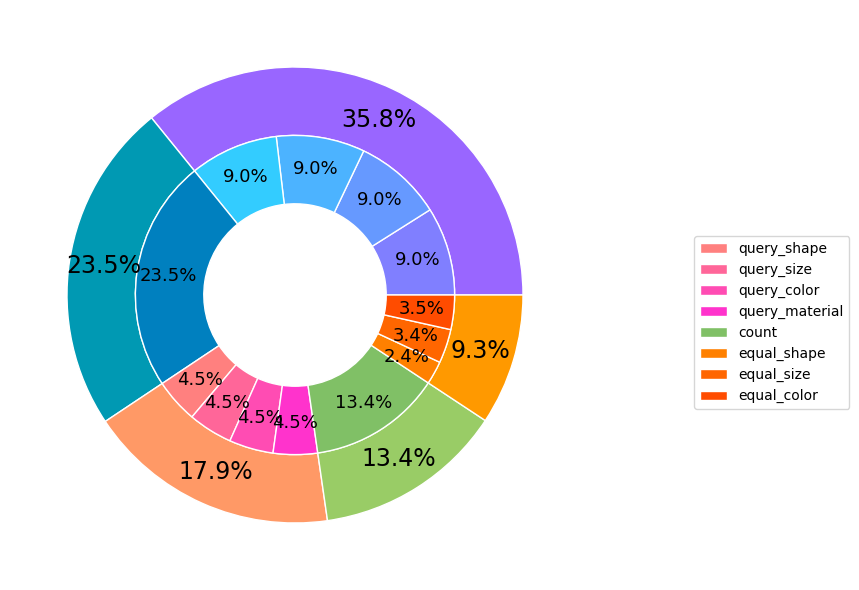

In [156]:

question_types = {'query': ['query_shape', 'query_size', 'query_color', 'query_material'],
                 'equal': ['equal_shape', 'equal_size', 'equal_color', 'equal_material'],
                 'compare': ['equal_integer', 'greater_than', 'less_than'],
                 'count': ['count'],
                 'exist': ['exist']}
part_question_types = {'query': ['query_shape', 'query_color', 'query_material'],
                 'partquery': ['partquery_partname', 'partquery_color', 'partquery_material']}

super_count = Counter()
for super_label in question_types:
    for sub_label in question_types[super_label]:
        super_count[super_label] += question_type_count[sub_label]
super_values = [c[1] for c in super_count.most_common()]
super_labels = [c[0] for c in super_count.most_common()]

sub_labels = []
for super_label in super_labels:
    sub_labels.extend(question_types[super_label])
sub_values = [question_type_count[a] for a in sub_labels]

size = 0.3

fig, ax = plt.subplots(figsize=(10,6))

# a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]
a,b,c,d,e = [plt.cm.cool, plt.cm.winter, plt.cm.spring, plt.cm.summer, plt.cm.autumn]
outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]
inner_colors = [a(.5), a(.4), a(.3), a(.2),
                b(.5),
                c(.5), c(.4), c(.3), c(.2),
                d(.5), 
                e(.5), e(.4), e(.3)]

ax.pie(super_values, 
       radius=1, 
       colors=outer_colors, 
#        labels=['query', '\n\ncount', 'equal', 'exist', '\n\ncompare'], 
#        labels=super_labels,
       textprops={'fontsize':17},
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct = '%0.1f%%',
      pctdistance =0.85,
      labeldistance=0.75)

ax.pie(sub_values, 
       radius=1-size, # size=0.3
       colors=inner_colors,
        labels=[' ' for s in sub_labels], 
       textprops={'fontsize':13},
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct = '%0.1f%%',
      pctdistance =0.8,
      labeldistance=0.3)

subgroup_names_legs=sub_labels
# plt.legend(subgroup_names_legs,loc='best')
# plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[5:], subgroup_names_legs, loc=(1.2, 0.3))
# ax.set_title('Object questions', fontsize=18, pad=15)    
print(super_labels)
plt.show()

['partquery_color', 'partquery_partname', 'partquery_material', 'query_shape', 'query_color', 'query_material']
[60000, 59999, 59995, 30000, 29999, 29873]


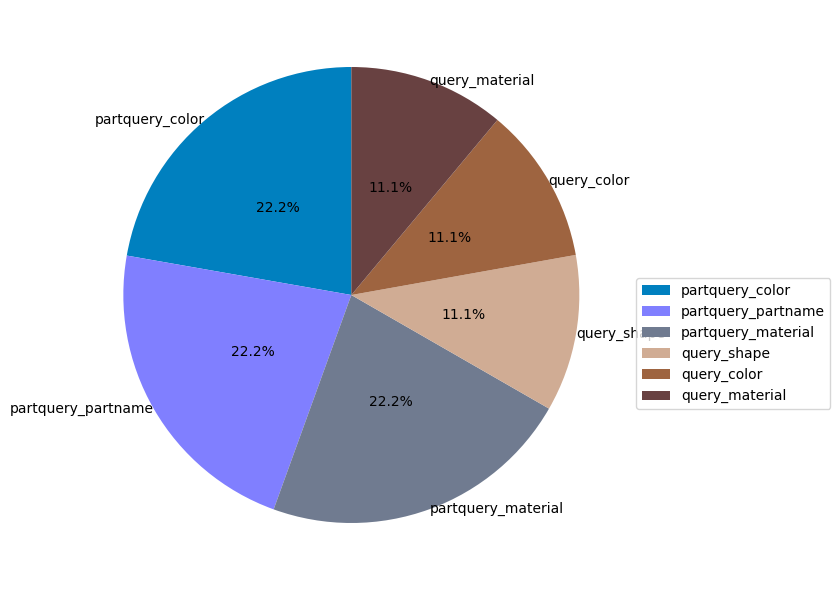

In [130]:
fig, ax = plt.subplots(figsize=(10,6))
data = [c[1] for c in part_question_type_count.most_common()]
labels = [c[0] for c in part_question_type_count.most_common()]
# labels = ['slice 1', 'slice 2', 'slice 3', 'slice 4', 'slice 5']


a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

colors = [plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.pink, plt.cm.summer, plt.cm.autumn]



# a,b,c,d,e = [plt.cm.cool, plt.cm.winter, plt.cm.spring, plt.cm.summer, plt.cm.autumn]
colors = [a(.5), b(.5), e(.5),
                g(.5), d(.5), g(.1)]

# colors = sns.color_palette('bright')
plt.pie(data, 
#         labels=[' ' for a in labels], 
        labels=labels,
        colors = colors, autopct = '%0.1f%%', startangle=90, labeldistance=1.0, pctdistance=0.5)
print(labels)
print(data)
handles, _ = ax.get_legend_handles_labels()

ax.legend(handles, labels, loc=(1.0, 0.3))
plt.show()

['partquery', 'query']
[179994, 89872]
['partquery_partname', 'partquery_color', 'partquery_material', 'query_shape', 'query_color', 'query_material']
[59999, 60000, 59995, 30000, 29999, 29873]


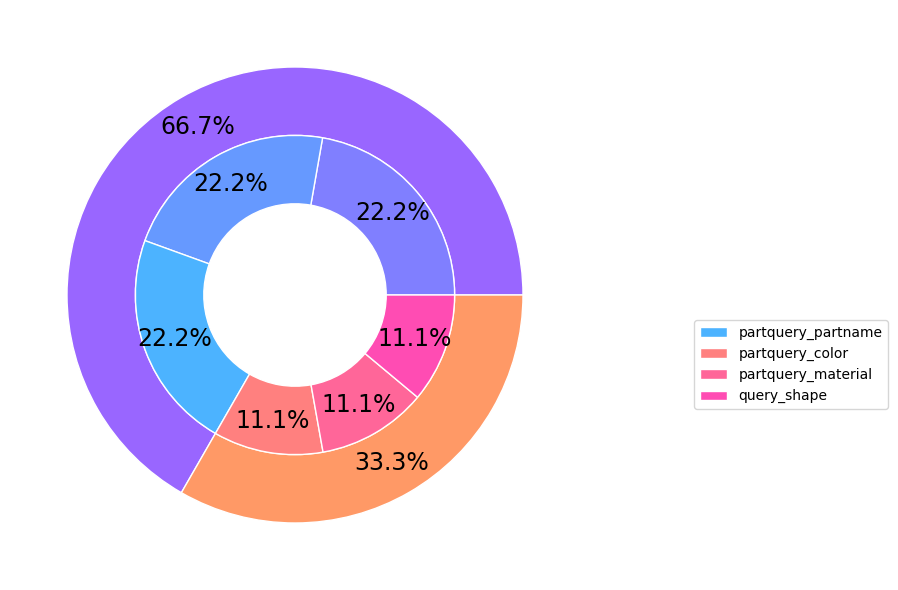

In [152]:
question_types = {'query': ['query_shape', 'query_size', 'query_color', 'query_material'],
                 'equal': ['equal_shape', 'equal_size', 'equal_color', 'equal_material'],
                 'compare': ['equal_integer', 'greater_than', 'less_than'],
                 'count': ['count'],
                 'exist': ['exist']}
part_question_types = {'query': ['query_shape', 'query_color', 'query_material'],
                 'partquery': ['partquery_partname', 'partquery_color', 'partquery_material']}

super_count = Counter()
for super_label in part_question_types:
    for sub_label in part_question_types[super_label]:
        super_count[super_label] += part_question_type_count[sub_label]
super_values = [c[1] for c in super_count.most_common()]
super_labels = [c[0] for c in super_count.most_common()]

sub_labels = []
for super_label in super_labels:
    sub_labels.extend(part_question_types[super_label])
sub_values = [part_question_type_count[a] for a in sub_labels]

size = 0.3

fig, ax = plt.subplots(figsize=(10,6))

# a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]
a,b,c,d,e = [plt.cm.cool, plt.cm.winter, plt.cm.spring, plt.cm.summer, plt.cm.autumn]
outer_colors = [a(.6),c(.6)]
inner_colors = [a(.5), a(.4), a(.3),
                c(.5), c(.4), c(.3)]

ax.pie(super_values, 
       radius=1, 
       colors=outer_colors, 
#        labels=['query', '\n\ncount', 'equal', 'exist', '\n\n\ncompare'], 
#        labels=super_labels,
       textprops={'fontsize':17},
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct = '%0.1f%%',
      pctdistance =0.85,
      labeldistance=0.75)

ax.pie(sub_values, 
       radius=1-size, # size=0.3
       colors=inner_colors,
        labels=[' ' for s in sub_labels], 
       textprops={'fontsize': 17},
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct = '%0.1f%%',
      pctdistance =0.8,
      labeldistance=0.3)

subgroup_names_legs=sub_labels
# plt.legend(subgroup_names_legs,loc='best')
# plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[2:], subgroup_names_legs, loc=(1.2, 0.3))
# ax.set_title('Object questions', fontsize=18, pad=15)    
print(super_labels)
print(super_values)
print(sub_labels)
print(sub_values)
plt.show()

In [138]:
part_question_type_count

Counter({'partquery_color': 60000,
         'partquery_partname': 59999,
         'partquery_material': 59995,
         'query_color': 29999,
         'query_shape': 30000,
         'query_material': 29873})